In [393]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import StandardScaler
import time
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import OneHotEncoder

# Data preparation

In [83]:
X, y = make_classification(
    n_samples=2502, 
    random_state=259202, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    class_sep=2)
Xm, ym = make_moons(n_samples=2502, random_state=259202)

In [84]:
X.shape

(2502, 2)

In [85]:
def plot_data(X, y, title=""):
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
    plt.title(title)
    plt.show()

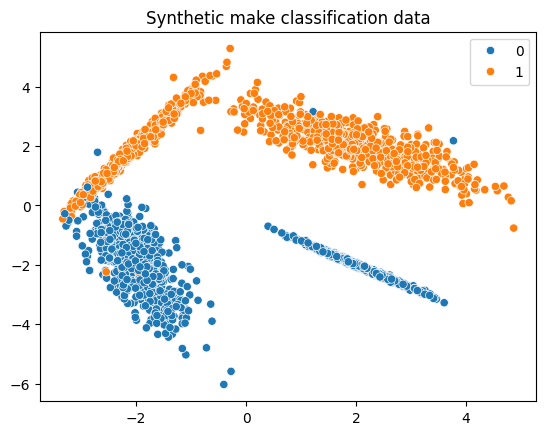

In [86]:
plot_data(X,y, "Synthetic make classification data")

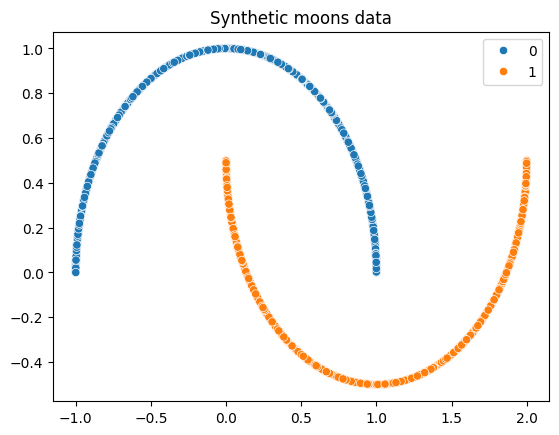

In [87]:
plot_data(Xm,ym, "Synthetic moons data")

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=259202)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, random_state=259202)

# Implementation of Logistic regression

In [89]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [91]:
def logistic_regression_old(X, y, lr = 0.01, max_iter=10000, eps=1e-6):
    X_ = np.hstack([np.ones((X.shape[0],1)), X]) # declaring shape (X.shape[0],1)
    w = np.zeros(X_.shape[1])
    
    for i in range(max_iter):
        w_old = w.copy()
        for j in range(X_.shape[0]):
            xj = X_[j]
            tj = y[j]
            zj = xj @ w # x(j).T @ w(j-1)
            yj = sigmoid(zj)
            delta = -lr * (tj - yj) * yj * (1 - yj) * xj
            w -= delta
            
        if np.linalg.norm(w - w_old) < eps:
            print(f"Converged after {i+1} iterations")
            break

    return w

In [92]:
def logistic_regression(X, y, lr = 0.01, max_iter=10000, eps=1e-6):
    X_ = np.hstack([np.ones((X.shape[0],1)), X]) # declaring shape (X.shape[0],1)
    w = np.zeros(X_.shape[1])
    
    for i in range(max_iter):
        w_old = w.copy()
        z = X_ @ w
        y_pred = sigmoid(z)
        error = (y - y_pred) * y_pred * (1 - y_pred)
        grad = X_.T @ error
        w += lr * grad
            
        if np.linalg.norm(w - w_old) < eps:
            print(f"Converged after {i+1} iterations")
            break

    return w

In [93]:
w = logistic_regression(X_train, y_train, lr=0.1)

Converged after 3455 iterations


In [94]:
X_test_ = np.hstack([np.ones((X_test.shape[0],1)),X_test])
y_score = sigmoid(X_test_ @ w)
y_pred = ( y_score >= 0.5).astype(int)

acc_implemented = accuracy_score(y_test,y_pred)

print(f"Implemented LR accuracy: {acc_implemented}")

Implemented LR accuracy: 0.9920127795527156


In [95]:
def plot_decision_boundary(w, X, y):
    
    # mesh grid
    h = 0.02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # decision function
    Z = w[0] + w[1] * xx + w[2] * yy
    Z = Z.reshape(xx.shape)
    
    # print("Z:", Z, Z.shape)
    
    plt.figure(figsize=(8, 6))
    
    # decision boundary
    plt.contourf(xx, yy, Z > 0.5, alpha=0.3)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Decision boundary implemented")
    plt.show()

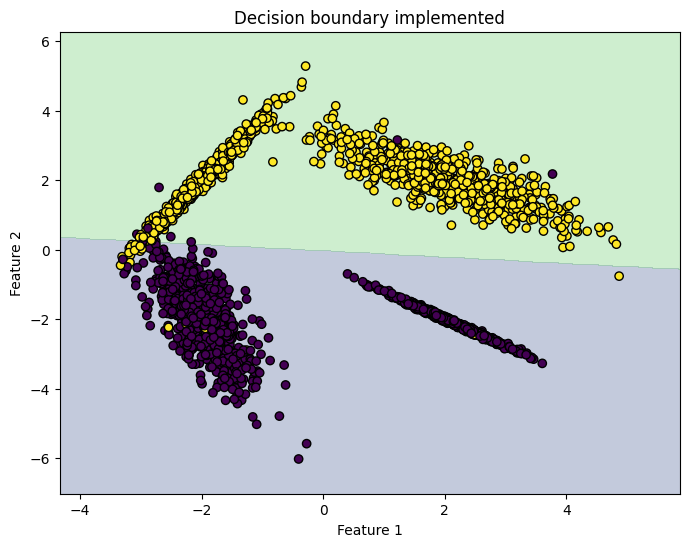

In [96]:
plot_decision_boundary(w, X, y)

In [97]:
wm = logistic_regression(Xm_train, ym_train, lr=0.1)

In [98]:
Xm_test_ = np.hstack([np.ones((Xm_test.shape[0],1)), Xm_test])
ym_score = sigmoid(Xm_test_ @ wm)
ym_pred = (ym_score >= 0.5).astype(int)

accuracym_implemented = accuracy_score(ym_test,ym_pred)

print(f"Implemented LR accuracy: {accuracym_implemented}")

Implemented LR accuracy: 0.8690095846645367


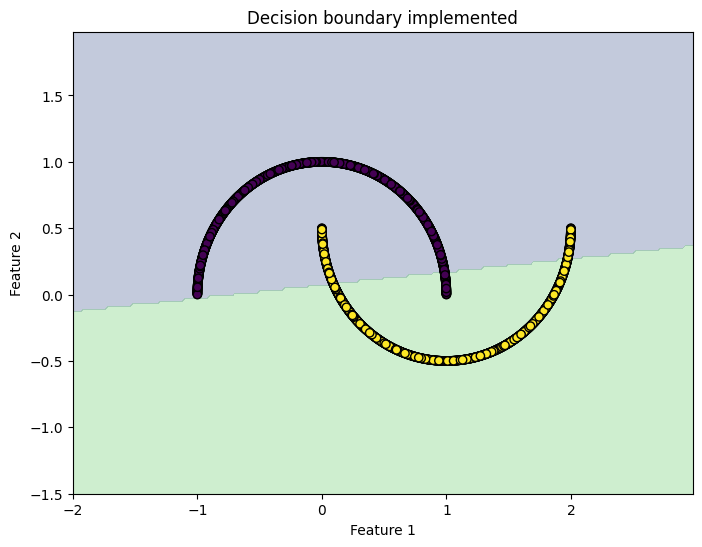

In [99]:
plot_decision_boundary(wm, Xm, ym)

# Built in classifier

make_classification dataset

In [100]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_skl = clf.predict(X_test)
y_score_skl = clf.predict_proba(X_test)[:,1] # second column in for positive class -> we need this for roc

accuracy_skl = accuracy_score(y_test, y_pred_skl)

In [101]:
accuracy_skl

0.9920127795527156

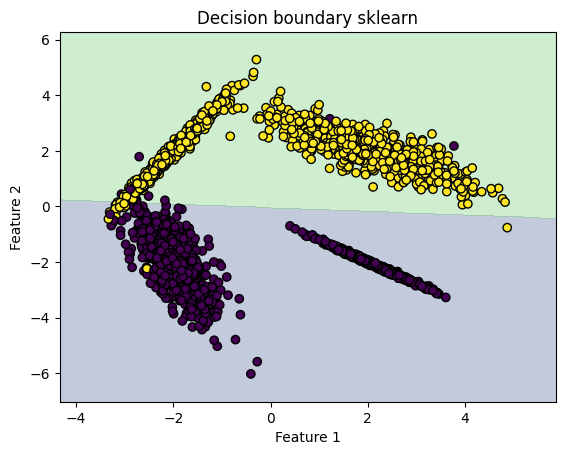

In [102]:
def plot_decision_boundary_clf(X, y, clf):
    h = 0.02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z > 0, alpha=0.3)
        
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Decision boundary sklearn")
    plt.show()
    
plot_decision_boundary_clf(X, y, clf)

moons dataset

In [103]:
clfm = LogisticRegression().fit(Xm_train,ym_train)
ym_pred_skl = clfm.predict(Xm_test)
ym_score_skl = clfm.predict_proba(Xm_test)[:,1]

accuracym_skl = accuracy_score(ym_test, ym_pred_skl)

In [104]:
accuracym_skl

0.8993610223642172

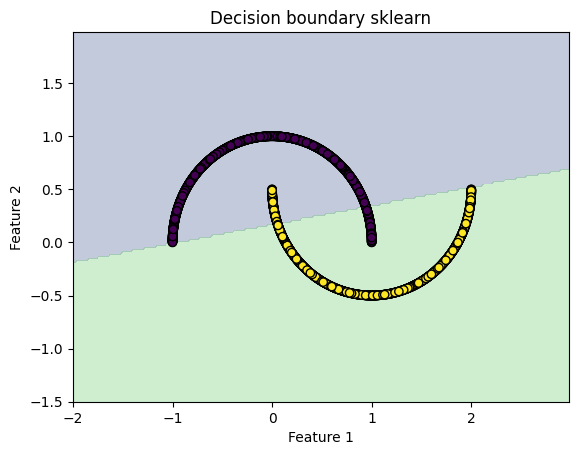

In [105]:
plot_decision_boundary_clf(Xm, ym, clfm)

# Evaluation

In [112]:
start_time = time.time()
for _ in range(10):
    w = logistic_regression(X_train, y_train)
numerical_time = time.time() - start_time

start_time = time.time()
for _ in range(10):
    w = logistic_regression_old(X_train, y_train)
numerical_time_loops = time.time() - start_time

start_time = time.time()
for _ in range(10):
    clf = LogisticRegression().fit(X_train, y_train)
sklearn_time = time.time() - start_time

In [113]:
print(f"Numerical time: {numerical_time:.6f} s")
print(f"Numerical time with loops: {numerical_time_loops:.6f} s")
print(f"Sklearn time: {sklearn_time:.6f} s")

Numerical time: 2.347828 s
Numerical time with loops: 825.883879 s
Sklearn time: 0.024981 s


As we can see broadcasting and vectorization achive substantial speed-up in computing, due to pushing all computations into optimized C loops. 

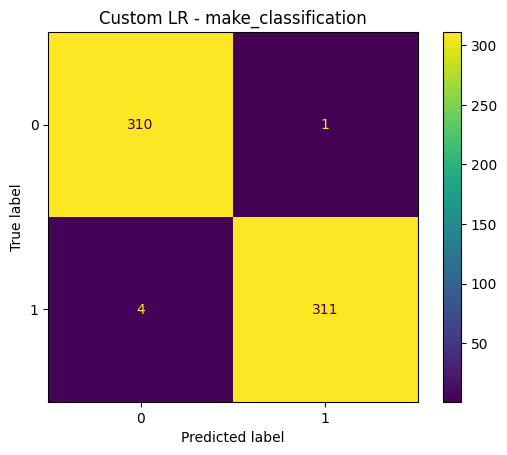

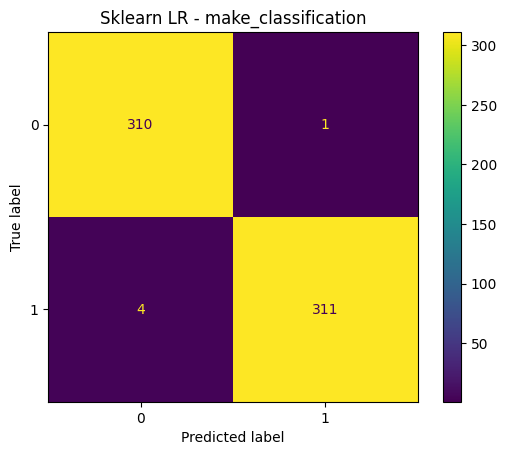

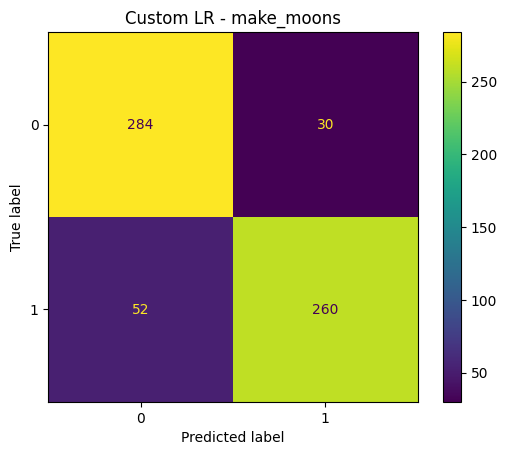

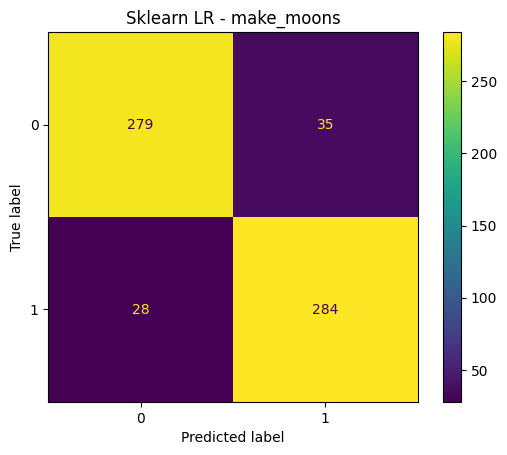

In [108]:
# make_classification dataset
cm_impl = confusion_matrix(y_test, y_pred)
disp_impl = ConfusionMatrixDisplay(cm_impl)
disp_impl.plot()
plt.title("Custom LR - make_classification")
plt.show()

cm_skl = confusion_matrix(y_test, y_pred_skl)
disp_skl = ConfusionMatrixDisplay(cm_skl)
disp_skl.plot()
plt.title("Sklearn LR - make_classification")
plt.show()


# make_moons dataset
cm_impl_m = confusion_matrix(ym_test, ym_pred)
disp_impl_m = ConfusionMatrixDisplay(cm_impl_m)
disp_impl_m.plot()
plt.title("Custom LR - make_moons")
plt.show()

cm_skl_m = confusion_matrix(ym_test, ym_pred_skl)
disp_skl_m = ConfusionMatrixDisplay(cm_skl_m)
disp_skl_m.plot()
plt.title("Sklearn LR - make_moons")
plt.show()

In [109]:
name = ["Numerical make_classification", "Sklearn make_classification", "Numerical moons", "Sklearn moons"]
for i, cm in enumerate([cm_impl, cm_skl, cm_impl_m, cm_skl_m]):
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn+fp) # swoistosc
    sensitivity = tp / (tp+fn) # czulosc
    print(name[i])
    print(f"specificity: {specificity}")
    print(f"sensitivity: {sensitivity}\n")

Numerical make_classification
specificity: 0.9967845659163987
sensitivity: 0.9873015873015873

Sklearn make_classification
specificity: 0.9967845659163987
sensitivity: 0.9873015873015873

Numerical moons
specificity: 0.9044585987261147
sensitivity: 0.8333333333333334

Sklearn moons
specificity: 0.8885350318471338
sensitivity: 0.9102564102564102



In [110]:
# make_classification
fpr_impl, tpr_impl, _ = roc_curve(y_test, y_score)
auc_impl = auc(fpr_impl, tpr_impl)

fpr_skl, tpr_skl, _ = roc_curve(y_test, y_score_skl)
auc_skl = auc(fpr_skl, tpr_skl)

# make_moons
fpr_impl_m, tpr_impl_m, _ = roc_curve(ym_test, ym_score)
auc_impl_m = auc(fpr_impl_m, tpr_impl_m)

fpr_skl_m, tpr_skl_m, _ = roc_curve(ym_test, ym_score_skl)
auc_skl_m = auc(fpr_skl_m, tpr_skl_m)

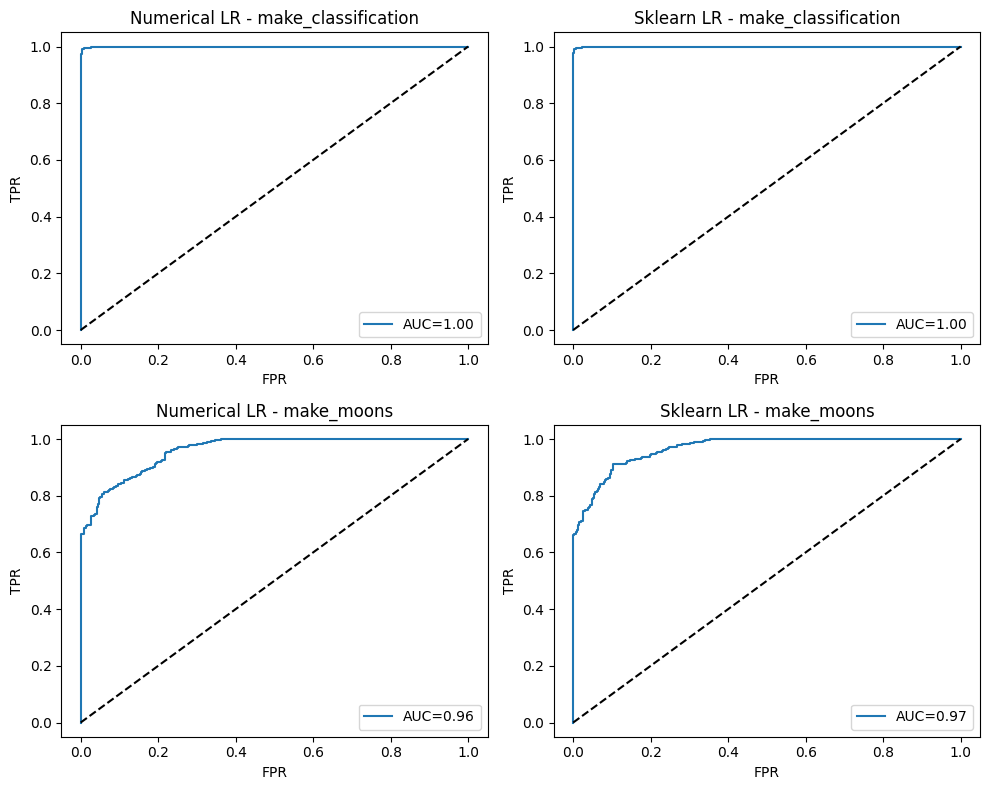

In [111]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].plot(fpr_impl, tpr_impl, label=f"AUC={auc_impl:.2f}")
axes[0,0].plot([0,1],[0,1],'k--')
axes[0,0].set_title("Numerical LR - make_classification")
axes[0,0].set_xlabel("FPR"); axes[0,0].set_ylabel("TPR")
axes[0,0].legend(loc="lower right")

axes[0,1].plot(fpr_skl, tpr_skl, label=f"AUC={auc_skl:.2f}")
axes[0,1].plot([0,1],[0,1],'k--')
axes[0,1].set_title("Sklearn LR - make_classification")
axes[0,1].set_xlabel("FPR"); axes[0,1].set_ylabel("TPR")
axes[0,1].legend(loc="lower right")

axes[1,0].plot(fpr_impl_m, tpr_impl_m, label=f"AUC={auc_impl_m:.2f}")
axes[1,0].plot([0,1],[0,1],'k--')
axes[1,0].set_title("Numerical LR - make_moons")
axes[1,0].set_xlabel("FPR"); axes[1,0].set_ylabel("TPR")
axes[1,0].legend(loc="lower right")

axes[1,1].plot(fpr_skl_m, tpr_skl_m, label=f"AUC={auc_skl_m:.2f}")
axes[1,1].plot([0,1],[0,1],'k--')
axes[1,1].set_title("Sklearn LR - make_moons")
axes[1,1].set_xlabel("FPR"); axes[1,1].set_ylabel("TPR")
axes[1,1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Rain in Australia

In [523]:
df = pd.read_csv("weatherAUS.csv")
df.shape

(145460, 23)

In [524]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [525]:
# check how many missing values each feature has
nan_count = df.isnull().sum()
nan_count

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [526]:
# number of rows
n = df.shape[0]
n

145460

In [527]:
bool_count = nan_count/n < 0.3
bool_count

Date              True
Location          True
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am         False
Cloud3pm         False
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [528]:
# remove features with more than 30% of missing data
df = df.loc[:, bool_count] 
df.shape

(145460, 19)

In [529]:
try:
    df = df.drop(columns=["Risk-MM"])
except:
   print("No column found") 

No column found


In [530]:
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

X.shape, y.shape

((145460, 18), (145460,))

In [531]:
X.dtypes, X.shape

(Date              object
 Location          object
 MinTemp          float64
 MaxTemp          float64
 Rainfall         float64
 WindGustDir       object
 WindGustSpeed    float64
 WindDir9am        object
 WindDir3pm        object
 WindSpeed9am     float64
 WindSpeed3pm     float64
 Humidity9am      float64
 Humidity3pm      float64
 Pressure9am      float64
 Pressure3pm      float64
 Temp9am          float64
 Temp3pm          float64
 RainToday         object
 dtype: object,
 (145460, 18))

In [532]:
num_cols = X.select_dtypes(include=[np.number])
cat_cols = X.select_dtypes(include=['object'])

num_cols.shape, cat_cols.shape

((145460, 12), (145460, 6))

In [533]:
print(f"Missing values: {X.isna().sum().sum()}")

for col in num_cols:
    X[col] = X[col].fillna(X[col].median())
for col in cat_cols:
    X[col] = X[col].fillna(X[col].mode()[0])
    
print(f"Missing values: {X.isna().sum().sum()}")

Missing values: 92110
Missing values: 0


In [534]:
# we also have some missing y_true values
print(f"Missing y values: {y.isna().sum().sum()},\nNot missing values: {y.notna().sum().sum()}\nAll values: {y.shape[0]}\n")
print(f"Missing values are: {y.isna().sum().sum()/y.shape[0]*100:.2f}% of all data")

Missing y values: 3267,
Not missing values: 142193
All values: 145460

Missing values are: 2.25% of all data


In [535]:
mask = y.notna()
X, y = X[mask], y[mask]

In [536]:
y.isna().sum().sum(), X.shape[0] == y.shape[0]

(0, True)

In [537]:
X.min()

Date             2007-11-01
Location           Adelaide
MinTemp                -8.5
MaxTemp                -4.8
Rainfall                0.0
WindGustDir               E
WindGustSpeed           6.0
WindDir9am                E
WindDir3pm                E
WindSpeed9am            0.0
WindSpeed3pm            0.0
Humidity9am             0.0
Humidity3pm             0.0
Pressure9am           980.5
Pressure3pm           977.1
Temp9am                -7.2
Temp3pm                -5.4
RainToday                No
dtype: object

In [538]:
# winsorizing the data that outlies more than 1.5 IQR 
# Inter Quartile Range - from Q1 to Q3
for col in num_cols:
    q1, q3 = np.quantile(X[col], [0.25,0.75]) # quantiles
    iqr = q3 - q1
    lb, ub = q1 - 1.5*iqr, q3 + 1.5*iqr
    X[col] = np.clip(X[col], lb, ub)

In [539]:
X.min()

Date             2007-11-01
Location           Adelaide
MinTemp                -6.2
MaxTemp                2.45
Rainfall                0.0
WindGustDir               E
WindGustSpeed           8.5
WindDir9am                E
WindDir3pm                E
WindSpeed9am            0.0
WindSpeed3pm            0.0
Humidity9am            18.0
Humidity3pm             0.0
Pressure9am         1001.05
Pressure3pm           998.4
Temp9am                -1.5
Temp3pm                 2.3
RainToday                No
dtype: object

Encoding date using sin/cos to to preserve the cyclical nature of the inputs.

In [540]:
X['Date'][:5]

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

In [541]:
X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')
X['Date'][:5]

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [542]:
X['day'] = X['Date'].dt.day
X['month'] = X['Date'].dt.month
X['year']  = X['Date'].dt.year

X['day'][:5], X['month'][:5]

(0    1
 1    2
 2    3
 3    4
 4    5
 Name: day, dtype: int32,
 0    12
 1    12
 2    12
 3    12
 4    12
 Name: month, dtype: int32)

Cyclically encode date: use sin and cos to map day/month onto the unit circle, preserving the cyclical order and avoiding artificial jumps (e.g. day 31 → day 1).

In [543]:
# Why sin+cos? 
angles = np.deg2rad([30, 150]) # two different angles
print("sin only:", np.sin(angles)) # [0.5, 0.5]
print("sin+cos pairs:", list(zip(np.sin(angles),
                                 np.cos(angles))))
# sin is identical, but (sin,cos) pairs are unique

sin only: [0.5 0.5]
sin+cos pairs: [(0.49999999999999994, 0.8660254037844387), (0.49999999999999994, -0.8660254037844387)]


In [544]:
X['day_sin'] = np.sin(2*np.pi*X['day']/31)
X['day_cos'] = np.cos(2*np.pi*X['day']/31)
X['month_sin'] = np.sin(2*np.pi*X['month']/12)
X['month_cos'] = np.cos(2*np.pi*X['month']/12)
X.drop(columns=['Date','day','month'], inplace=True)

In [546]:
X.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
year               int32
day_sin          float64
day_cos          float64
month_sin        float64
month_cos        float64
dtype: object

In [547]:
num_cols = X.select_dtypes(include=[np.number])
cat_cols = X.select_dtypes(include=['object'])

cat_cols

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No
...,...,...,...,...,...
145454,Uluru,E,ESE,E,No
145455,Uluru,E,SE,ENE,No
145456,Uluru,NNW,SE,N,No
145457,Uluru,N,SE,WNW,No


In [548]:
cols_to_encode = [col for col in cat_cols if col != 'Location']

ohe = OneHotEncoder(handle_unknown = 'error', sparse_output = False).set_output(transform='pandas')

ohetransform = ohe.fit_transform(X[cols_to_encode])

ohetransform

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [549]:
X_ = X.drop(columns=cols_to_encode).join(ohetransform)
X_

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,Uluru,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,Uluru,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,Uluru,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [550]:
# There is no need to standarize sin/cos, since their values ranges between -1 and 1 already
num_cols = num_cols.drop(columns=['day_sin', 'day_cos', 'month_sin', 'month_cos'])

In [551]:
num_cols

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,year
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2008
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2008
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2008
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2008
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,2017
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,2017
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,2017
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,2017


In [552]:
y = (y == 'Yes').astype(int)
y.unique()

array([0, 1])

In [553]:
region_models = {}
region_accuracies = {}
region_test_data = {}
best_region = None
best_accuracy = 0
all_test_sets = []

for region in X_['Location'].unique():
    print(f"\nRegion: {region}")
    
    mask = X_['Location'] == region
    X_region, y_region = X_[mask].drop(columns=['Location']), y[mask]
    
    # stratify=yi makes sure the split keeps the same class proportions as in yi
    X_train, X_test, y_train, y_test = train_test_split(X_region, y_region, stratify=y_region, random_state=259202)
    
    X_train_ = X_train.copy()
    X_test_ = X_test.copy()
    
    scalers = {}
    
    for col in num_cols:
        
        scaler = StandardScaler()
        
        X_train_[col] = scaler.fit_transform(X_train_[col].values.reshape(-1, 1)).flatten()
        X_test_[col] = scaler.transform(X_test_[col].values.reshape(-1, 1)).flatten()
        
        scalers[col] = scaler
        
    # add test now, cause later when we split the data, some training values could be now in test set    
    all_test_sets.append((X_test, y_test, region))
    
    clf = LogisticRegression().fit(X_train_, y_train)
    
    y_pred = clf.predict(X_test_)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    region_models[region] = {
        'model': clf,
        'scalers': scalers,
    }
    
    region_accuracies[region] = accuracy
    
    print(f"Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_region = region    
    
print(f"\nBest model for region: {best_region} with accuracy of {best_accuracy}")



Region: Albury
Accuracy: 0.8711819389110226

Region: BadgerysCreek
Accuracy: 0.889344262295082

Region: Cobar
Accuracy: 0.9116465863453815

Region: CoffsHarbour
Accuracy: 0.8173207036535859

Region: Moree
Accuracy: 0.896358543417367

Region: Newcastle
Accuracy: 0.7753721244925575

Region: NorahHead
Accuracy: 0.8240109140518418

Region: NorfolkIsland
Accuracy: 0.7921727395411606

Region: Penrith
Accuracy: 0.8596491228070176

Region: Richmond
Accuracy: 0.8861788617886179

Region: Sydney
Accuracy: 0.8287425149700599

Region: SydneyAirport
Accuracy: 0.8271276595744681

Region: WaggaWagga
Accuracy: 0.8870967741935484

Region: Williamtown
Accuracy: 0.7965571205007824

Region: Wollongong
Accuracy: 0.8324396782841823

Region: Canberra
Accuracy: 0.8807017543859649

Region: Tuggeranong
Accuracy: 0.8693333333333333

Region: MountGinini
Accuracy: 0.8239339752407153

Region: Ballarat
Accuracy: 0.8599735799207398

Region: Bendigo
Accuracy: 0.8722002635046113

Region: Sale
Accuracy: 0.832

Region: M

Best accuracy for region: Woomera. 

Comapre implemented LR with sklearn.

In [554]:
region = 'Woomera'

mask = X_['Location'] == 'Woomera'

X_woomera, y_woomera = X_[mask].drop(columns=['Location']), y[mask]
X_woomera.shape, y_woomera.shape

((2990, 67), (2990,))

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X_woomera, y_woomera, stratify=y_woomera, random_state=259202)

X_train_ = X_train.copy()
X_test_ = X_test.copy()

for col in num_cols:
        
    scaler = StandardScaler()
    
    X_train_[col] = scaler.fit_transform(X_train_[col].values.reshape(-1, 1)).flatten()
    X_test_[col] = scaler.transform(X_test_[col].values.reshape(-1, 1)).flatten()

In [556]:
w_woomera = logistic_regression(X_train_, y_train, lr=0.1)

In [557]:
X_test_bias = np.hstack([np.ones((X_test_.shape[0],1)),X_test_])
y_score = sigmoid(X_test_bias @ w_woomera)
y_pred = ( y_score >= 0.5).astype(int)

acc_woomera = accuracy_score(y_test,y_pred)

print(f"Implemented LR accuracy: {acc_woomera}")

Implemented LR accuracy: 0.9371657754010695
